MDDSC - Tarea #1
Semiconductor elegido: Silicio (Si)

Variación de Energy Bandgap en función de la temperatura
$$E_g(T)=E_g(0)-{{\alpha T^2}\over{T+\beta}}$$

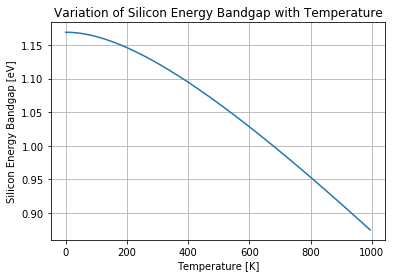

In [7]:

import numpy as np
import matplotlib.pyplot as plt

Eg0_Si=1.169
alpha_Si=4.9*10**-4
beta_Si=655

T_start=0
T_stop=1000
T_step=5

T=np.arange(T_start,T_stop,T_step)

Eg=Eg0_Si-(alpha_Si*T**2)/(beta_Si+T)

plt.figure()
plt.plot(T,Eg)
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Silicon Energy Bandgap [eV]')
plt.title('Variation of Silicon Energy Bandgap with Temperature')
plt.show()

Variación del nivel de Fermi de Si intrínseco en función de la temperatura (respecto del límite de la banda de valencia)
$$E_{Fi}-E_v = {1 \over 2} E_g-{3 \over 4}k_BT\ln({m_e^* \over m_h^*})$$

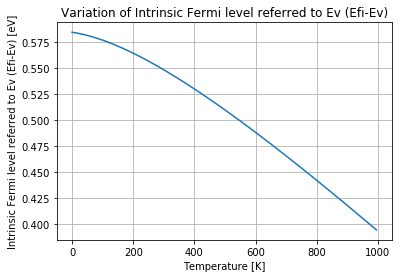

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

kB,_,_ = scipy.constants.physical_constants["Boltzmann constant in eV/K"]
me,_,_= scipy.constants.physical_constants["electron mass"]


Eg0_Si=1.169
alpha_Si=4.9*10**-4
beta_Si=655

T_start=0
T_stop=1000
T_step=5

meeff=1.1*me
mheff=0.56*me

T=np.arange(T_start,T_stop,T_step)

Eg=Eg0_Si-(alpha_Si*T**2)/(beta_Si+T)

EfiEv=(1/2)*Eg-(3/4)*kB*T*np.log(meeff/mheff)

plt.figure()
plt.plot(T,EfiEv)
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Intrinsic Fermi level referred to Ev (Efi-Ev) [eV]')
plt.title('Variation of Intrinsic Fermi level referred to Ev (Efi-Ev)')
plt.show()

Como estamos en un semiconductor intrínseco, donde la cantidad de electrones y huecos siempre es igual, el nivel de Fermi permanece ubicado siempre en el medio de la banda prohibida. Por lo tanto, medido con respecto a Ev (nivel máximo de la banda de valencia), coincidirá numéricamente con la mitad del valor de Eg graficado anteriormente.

Variación de densidad de portadores intrínsecos en función de la temperatura
$$n_i=\sqrt{N_c N_v} e^{{-Eg \over {kB T}}}$$
$$N_c=2({2\pi m_e^* k_B T \over h^2 })^{3 \over 2}$$
$$N_v=2({2\pi m_h^* k_B T \over h^2 })^{3 \over 2}$$

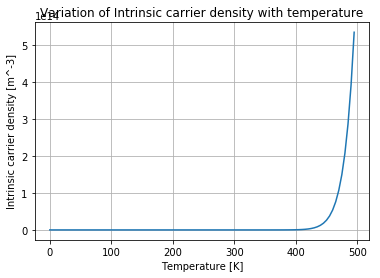

In [15]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr  2 11:15:06 2019

@author: andres
"""


import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
np.seterr(divide='ignore', invalid='ignore')

kB,_,_ = scipy.constants.physical_constants["Boltzmann constant"]
kBeV,_,_ = scipy.constants.physical_constants["Boltzmann constant in eV/K"]
me,_,_= scipy.constants.physical_constants["electron mass"]
h,_,_= scipy.constants.physical_constants["Planck constant"]


Eg0_Si=1.169
alpha_Si=4.9*10**-4
beta_Si=655

T_start=0
T_stop=500
T_step=5

meeff=1.1*me
mheff=0.56*me

T=np.arange(T_start,T_stop,T_step)

Eg=Eg0_Si-(alpha_Si*T**2)/(beta_Si+T)

EfiEv=(1/2)*Eg-(3/4)*kBeV*T*np.log(meeff/mheff)

Nc=2*((2*np.pi*meeff*kB*T)/(h*h))**(3/2)
Nv=2*((2*np.pi*mheff*kB*T)/(h*h))**(3/2)

ni=np.sqrt(Nc*Nv)*np.exp(-Eg/(kBeV*T))

plt.figure()
plt.plot(T,ni)
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Intrinsic carrier density [m^-3]')
plt.title('Variation of Intrinsic carrier density with temperature')
plt.show()

Variación de densidad de portadores libres en función de la temperatura
$$n=N_c e^{{-({Ec-Ef}) \over {kB T}}}$$
$$p=N_c e^{{-({Ev-Ef}) \over {kB T}}}$$
$$N_c=2({2\pi m_e^* k_B T \over h^2 })^{3 \over 2}$$
$$N_v=2({2\pi m_h^* k_B T \over h^2 })^{3 \over 2}$$

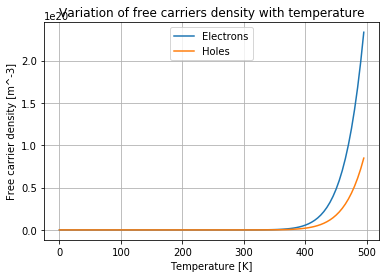

In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr  2 12:47:49 2019

@author: andres
"""



import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
np.seterr(divide='ignore', invalid='ignore')

kB,_,_ = scipy.constants.physical_constants["Boltzmann constant"]
kBeV,_,_ = scipy.constants.physical_constants["Boltzmann constant in eV/K"]
me,_,_= scipy.constants.physical_constants["electron mass"]
h,_,_= scipy.constants.physical_constants["Planck constant"]


Eg0_Si=1.169
alpha_Si=4.9*10**-4
beta_Si=655

T_start=0
T_stop=500
T_step=5

meeff=1.1*me
mheff=0.56*me

T=np.arange(T_start,T_stop,T_step)

Eg=Eg0_Si-(alpha_Si*T**2)/(beta_Si+T)

EfiEv=(1/2)*Eg-(3/4)*kBeV*T*np.log(meeff/mheff)

Nc=2*((2*np.pi*meeff*kB*T)/(h*h))**(3/2)
Nv=2*((2*np.pi*mheff*kB*T)/(h*h))**(3/2)

ni=np.sqrt(Nc*Nv)*np.exp(-Eg/(kBeV*T))

n=Nc*np.exp(-(Eg/2)/(kBeV*T))
p=Nv*np.exp(-(Eg/2)/(kBeV*T))

plt.figure()
plt.plot(T,n,label='Electrons')
plt.plot(T,p,label='Holes')
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Free carrier density [m^-3]')
plt.title('Variation of free carriers density with temperature')
plt.legend(loc='upper center')
plt.show()

Variación de la conductividad de Si y Cu en función de la temperatura
$$\sigma_i=n_i e (\mu_e + \mu_h)$$
$$n_i=\sqrt{N_c N_v} e^{{-Eg \over {kB T}}}$$
$$e=

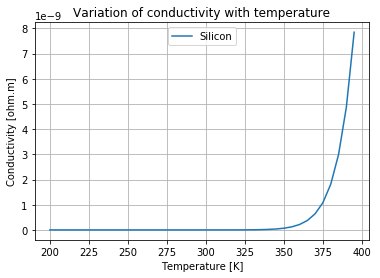

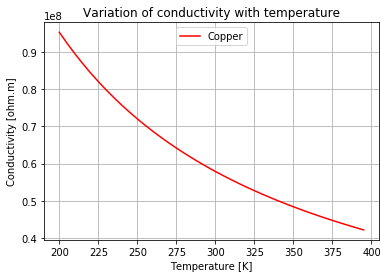

In [21]:


import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
np.seterr(divide='ignore', invalid='ignore')

kB,_,_ = scipy.constants.physical_constants["Boltzmann constant"]
kBeV,_,_ = scipy.constants.physical_constants["Boltzmann constant in eV/K"]
me,_,_= scipy.constants.physical_constants["electron mass"]
h,_,_= scipy.constants.physical_constants["Planck constant"]
e,_,_= scipy.constants.physical_constants["elementary charge"]


Eg0_Si=1.169
alpha_Si=4.9*10**-4
beta_Si=655

T_start=200
T_stop=400
T_step=5

meeff=1.1*me
mheff=0.56*me

T=np.arange(T_start,T_stop,T_step)

Eg=Eg0_Si-(alpha_Si*T**2)/(beta_Si+T)

EfiEv=(1/2)*Eg-(3/4)*kBeV*T*np.log(meeff/mheff)

Nc=2*((2*np.pi*meeff*kB*T)/(h*h))**(3/2)
Nv=2*((2*np.pi*mheff*kB*T)/(h*h))**(3/2)

ni=np.sqrt(Nc*Nv)*np.exp(-Eg/(kBeV*T))

mue=0.1350
muh=0.045

sigmai=ni*e*(mue+muh)

#%%

Tref=273+20
alfa=0.004041
resist_ref=1.68*10**-8

resist=resist_ref*(1+alfa*(T-Tref))

sigma_cu=1/resist




#%%

plt.figure()
plt.plot(T,sigmai,label='Silicon')
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Conductivity [ohm.m]')
plt.title('Variation of conductivity with temperature')
plt.legend(loc='upper center')
plt.show()

#%%
plt.figure()
plt.plot(T,sigma_cu,'r',label='Copper')
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Conductivity [ohm.m]')
plt.title('Variation of conductivity with temperature')
plt.legend(loc='upper center')
plt.show()

Se realizaron dos gráficos diferentes, dada la gran dificultad de presentar en un mismo gráfico dos juegos de valores de magnitudes muy diferentes, y a la vez, velocidades de variación tan dispares. En una escala lineal, la conductividad del Si se visualizaría como nula comparada a la del cobre. En una escala logarítmica, sería posible observar ambas curvas, pero como la variabilidad del Si es mucho mayor a la del Cu, la conductividad del Cu se vería casi constante.
De lo anterior, podemos concluir que:
-En el semiconductor, la conductividad aumenta con la temperatura, siendo este aumento exponencial y de varios ordenes de magnitud en algunos cientos de grados de variación.
-En el metal, la conductividad disminuye con la temperatura, aunque con una velocidad de variación mucho más lenta.